# CHHATTISGARH


In [1]:
import pandas as pd

# Load the datasets for Chhattisgarh
df_chhattisgarh_enrolment = pd.read_csv('/content/Chhattisgarh Enrolment State.csv')
df_chhattisgarh_demographic = pd.read_csv('/content/Chhattisgarh Demographic State.csv')
df_chhattisgarh_biometric = pd.read_csv('/content/Chhattisgarh Biometric State.csv')

print("Chhattisgarh Enrolment Dataset:")
print(df_chhattisgarh_enrolment.head())
print(df_chhattisgarh_enrolment.info())
print(df_chhattisgarh_enrolment.describe())

print("\nChhattisgarh Demographic Dataset:")
print(df_chhattisgarh_demographic.head())
print(df_chhattisgarh_demographic.info())
print(df_chhattisgarh_demographic.describe())

print("\nChhattisgarh Biometric Dataset:")
print(df_chhattisgarh_biometric.head())
print(df_chhattisgarh_biometric.info())
print(df_chhattisgarh_biometric.describe())

Chhattisgarh Enrolment Dataset:
         date         state      district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Chhattisgarh  Baloda Bazar   493101        7         1   
1  01-09-2025  Chhattisgarh  Baloda Bazar   493222        3         0   
2  01-09-2025  Chhattisgarh  Baloda Bazar   493332        5         1   
3  01-09-2025  Chhattisgarh  Baloda Bazar   493559        4         1   
4  01-09-2025  Chhattisgarh     Balrampur   497001        5         0   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            22161 non-null  object
 1   state           22161 non-null  object
 2   district        22161 non-null  object
 3   pincode         22161 non-null  int64 
 4   age_0_5         22161 non-null  

In [2]:
df_chhattisgarh_enrolment['date'] = pd.to_datetime(df_chhattisgarh_enrolment['date'], format='%d-%m-%Y')
df_chhattisgarh_demographic['date'] = pd.to_datetime(df_chhattisgarh_demographic['date'], format='%d-%m-%Y')
df_chhattisgarh_biometric['date'] = pd.to_datetime(df_chhattisgarh_biometric['date'], format='%d-%m-%Y')

merged_chhattisgarh_df_temp = pd.merge(df_chhattisgarh_enrolment, df_chhattisgarh_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_chhattisgarh_merged = pd.merge(merged_chhattisgarh_df_temp, df_chhattisgarh_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_chhattisgarh_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_chhattisgarh_merged[numeric_cols] = df_chhattisgarh_merged[numeric_cols].fillna(0)

print("Data types after date conversion for df_chhattisgarh_enrolment:")
print(df_chhattisgarh_enrolment.info())
print("\nData types after date conversion for df_chhattisgarh_demographic:")
print(df_chhattisgarh_demographic.info())
print("\nData types after date conversion for df_chhattisgarh_biometric:")
print(df_chhattisgarh_biometric.info())

print("\nMerged Chhattisgarh DataFrame (df_chhattisgarh_merged) head:")
print(df_chhattisgarh_merged.head())
print("\nMerged Chhattisgarh DataFrame (df_chhattisgarh_merged) info:")
print(df_chhattisgarh_merged.info())
print("\nMerged Chhattisgarh DataFrame (df_chhattisgarh_merged) describe:")
print(df_chhattisgarh_merged.describe())

Data types after date conversion for df_chhattisgarh_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            22161 non-null  datetime64[ns]
 1   state           22161 non-null  object        
 2   district        22161 non-null  object        
 3   pincode         22161 non-null  int64         
 4   age_0_5         22161 non-null  int64         
 5   age_5_17        22161 non-null  int64         
 6   age_18_greater  22161 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ MB
None

Data types after date conversion for df_chhattisgarh_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39290 entries, 0 to 39289
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date

In [3]:
df_chhattisgarh = df_chhattisgarh_merged[df_chhattisgarh_merged['state'] == 'Chhattisgarh'].copy()
df_chhattisgarh['year'] = df_chhattisgarh['date'].dt.year
df_chhattisgarh['month'] = df_chhattisgarh['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_chhattisgarh_agg = df_chhattisgarh.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Shape of df_chhattisgarh:", df_chhattisgarh.shape)
print("\nFirst 5 rows of df_chhattisgarh with new 'year' and 'month' columns:")
print(df_chhattisgarh.head())
print("\nAggregated DataFrame (df_chhattisgarh_agg) head:")
print(df_chhattisgarh_agg.head())
print("\nAggregated DataFrame (df_chhattisgarh_agg) info:")
print(df_chhattisgarh_agg.info())

Shape of df_chhattisgarh: (114080, 13)

First 5 rows of df_chhattisgarh with new 'year' and 'month' columns:
        date         state district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Chhattisgarh    Balod   491221      0.0       0.0   
1 2025-03-01  Chhattisgarh    Balod   491221      0.0       0.0   
2 2025-03-01  Chhattisgarh    Balod   491222      0.0       0.0   
3 2025-03-01  Chhattisgarh    Balod   491222      0.0       0.0   
4 2025-03-01  Chhattisgarh    Balod   491223      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0            0.0           0.0          15.0         91.0   
1             0.0            0.0           0.0          15.0         91.0   
2             0.0           72.0         697.0         104.0        554.0   
3             0.0           72.0         697.0         104.0        554.0   
4             0.0           99.0         981.0          90.0        591.0   

   year  month  
0  2025 

**Reasoning**:
The next step is to compute several derived metrics for `df_chhattisgarh_agg` including total enrolments, child enrolments, total demographic updates, total biometric updates, and corresponding rates (CES, DUR, BUR). I will ensure to handle division by zero for rate calculations using `numpy.where` and then display the head of the DataFrame to show these new columns.



In [4]:
import numpy as np

# 1. Create 'totalenrolments' column
df_chhattisgarh_agg['totalenrolments'] = df_chhattisgarh_agg['age_0_5'] + df_chhattisgarh_agg['age_5_17'] + df_chhattisgarh_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_chhattisgarh_agg['childenrolments'] = df_chhattisgarh_agg['age_0_5'] + df_chhattisgarh_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_chhattisgarh_agg['totaldemoupdates'] = df_chhattisgarh_agg['demo_age_5_17'] + df_chhattisgarh_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_chhattisgarh_agg['totalbioupdates'] = df_chhattisgarh_agg['bio_age_5_17'] + df_chhattisgarh_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_chhattisgarh_agg['CES'] = np.where(
    df_chhattisgarh_agg['totalenrolments'] == 0,
    0,
    df_chhattisgarh_agg['childenrolments'] / df_chhattisgarh_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_chhattisgarh_agg['DUR'] = np.where(
    df_chhattisgarh_agg['totalenrolments'] == 0,
    0,
    df_chhattisgarh_agg['totaldemoupdates'] / df_chhattisgarh_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_chhattisgarh_agg['BUR'] = np.where(
    df_chhattisgarh_agg['totalenrolments'] == 0,
    0,
    df_chhattisgarh_agg['totalbioupdates'] / df_chhattisgarh_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_chhattisgarh_agg) with new metrics head:")
print(df_chhattisgarh_agg.head())

Aggregated DataFrame (df_chhattisgarh_agg) with new metrics head:
   year  month         state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chhattisgarh         Balod      0.0       0.0             0.0   
1  2025      3  Chhattisgarh  Baloda Bazar      0.0       0.0             0.0   
2  2025      3  Chhattisgarh     Balrampur      0.0       0.0             0.0   
3  2025      3  Chhattisgarh        Bastar      0.0       0.0             0.0   
4  2025      3  Chhattisgarh      Bemetara      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          626.0        7861.0        1101.0       5477.0              0.0   
1          547.0       19367.0        1797.0       5757.0              0.0   
2          371.0        4179.0         653.0       1902.0              0.0   
3          686.0        8259.0        1188.0       5238.0              0.0   
4          266.0        8117.0         898.0       6437.0

In [5]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_chhattisgarh_agg['Enorm'] = df_chhattisgarh_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_chhattisgarh_agg['Dnorm'] = df_chhattisgarh_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_chhattisgarh_agg['Bnorm'] = df_chhattisgarh_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_chhattisgarh_agg['stdnorm'] = (df_chhattisgarh_agg['Enorm'] + df_chhattisgarh_agg['Dnorm'] + df_chhattisgarh_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_chhattisgarh_agg['ALBI'] = 1 - df_chhattisgarh_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_chhattisgarh_agg['ALBI'] = df_chhattisgarh_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_chhattisgarh_agg) with normalized metrics and ALBI head:")
print(df_chhattisgarh_agg.head())

Aggregated DataFrame (df_chhattisgarh_agg) with normalized metrics and ALBI head:
   year  month         state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chhattisgarh         Balod      0.0       0.0             0.0   
1  2025      3  Chhattisgarh  Baloda Bazar      0.0       0.0             0.0   
2  2025      3  Chhattisgarh     Balrampur      0.0       0.0             0.0   
3  2025      3  Chhattisgarh        Bastar      0.0       0.0             0.0   
4  2025      3  Chhattisgarh      Bemetara      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          626.0        7861.0        1101.0  ...            8487.0   
1          547.0       19367.0        1797.0  ...           19914.0   
2          371.0        4179.0         653.0  ...            4550.0   
3          686.0        8259.0        1188.0  ...            8945.0   
4          266.0        8117.0         898.0  ...            8383.0   

   t

In [6]:
df_chhattisgarh_agg['Enormrisk'] = 1 - df_chhattisgarh_agg['Enorm']
df_chhattisgarh_agg['CESrisknorm'] = 1 - df_chhattisgarh_agg['CES']
df_chhattisgarh_agg['DURrisknorm'] = 1 - df_chhattisgarh_agg['DUR']
df_chhattisgarh_agg['BURrisknorm'] = 1 - df_chhattisgarh_agg['BUR']
df_chhattisgarh_agg['ALBIrisknorm'] = 1 - df_chhattisgarh_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_chhattisgarh_agg['riskscore'] = (
    df_chhattisgarh_agg['Enormrisk'] +
    df_chhattisgarh_agg['CESrisknorm'] +
    df_chhattisgarh_agg['DURrisknorm'] +
    df_chhattisgarh_agg['BURrisknorm'] +
    df_chhattisgarh_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_chhattisgarh_agg) with risk components and riskscore head:")
print(df_chhattisgarh_agg.head())

Aggregated DataFrame (df_chhattisgarh_agg) with risk components and riskscore head:
   year  month         state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chhattisgarh         Balod      0.0       0.0             0.0   
1  2025      3  Chhattisgarh  Baloda Bazar      0.0       0.0             0.0   
2  2025      3  Chhattisgarh     Balrampur      0.0       0.0             0.0   
3  2025      3  Chhattisgarh        Bastar      0.0       0.0             0.0   
4  2025      3  Chhattisgarh      Bemetara      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          626.0        7861.0        1101.0  ...  0.191218  0.079126   
1          547.0       19367.0        1797.0  ...  0.448675  0.090866   
2          371.0        4179.0         653.0  ...  0.102514  0.030734   
3          686.0        8259.0        1188.0  ...  0.201537  0.077298   
4          266.0        8117.0         898.0  ...  0.188874  0.0

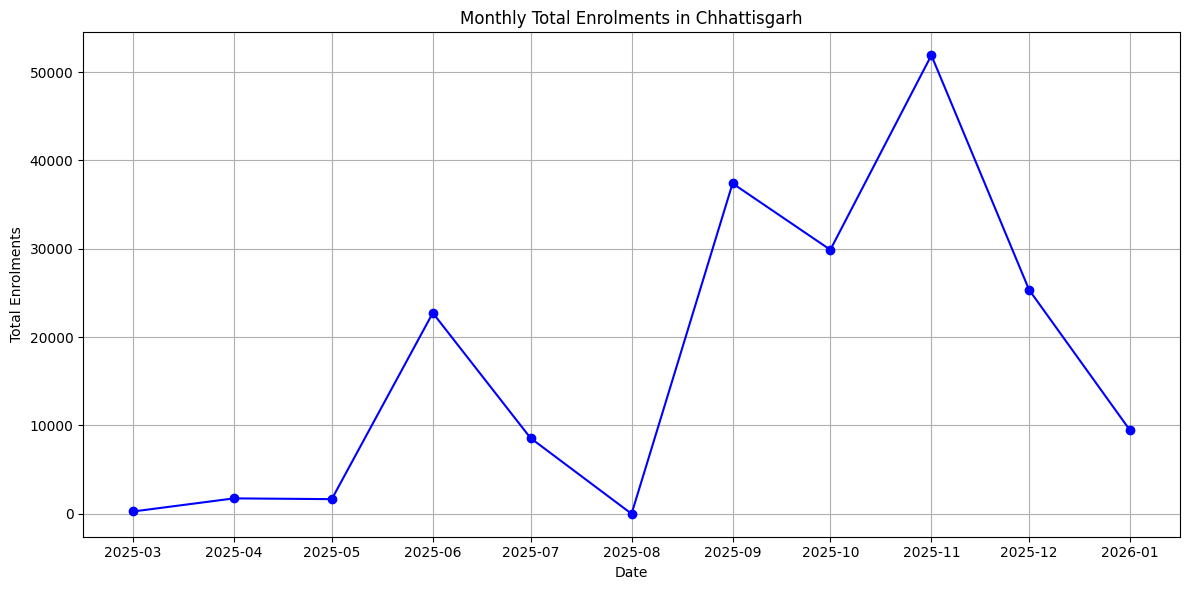

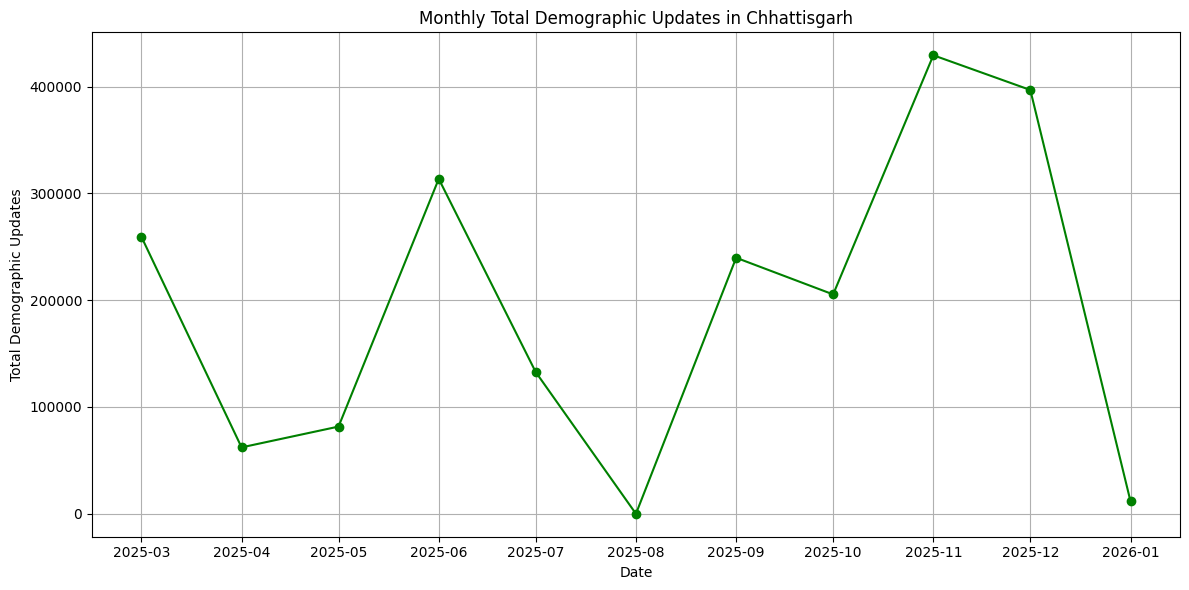

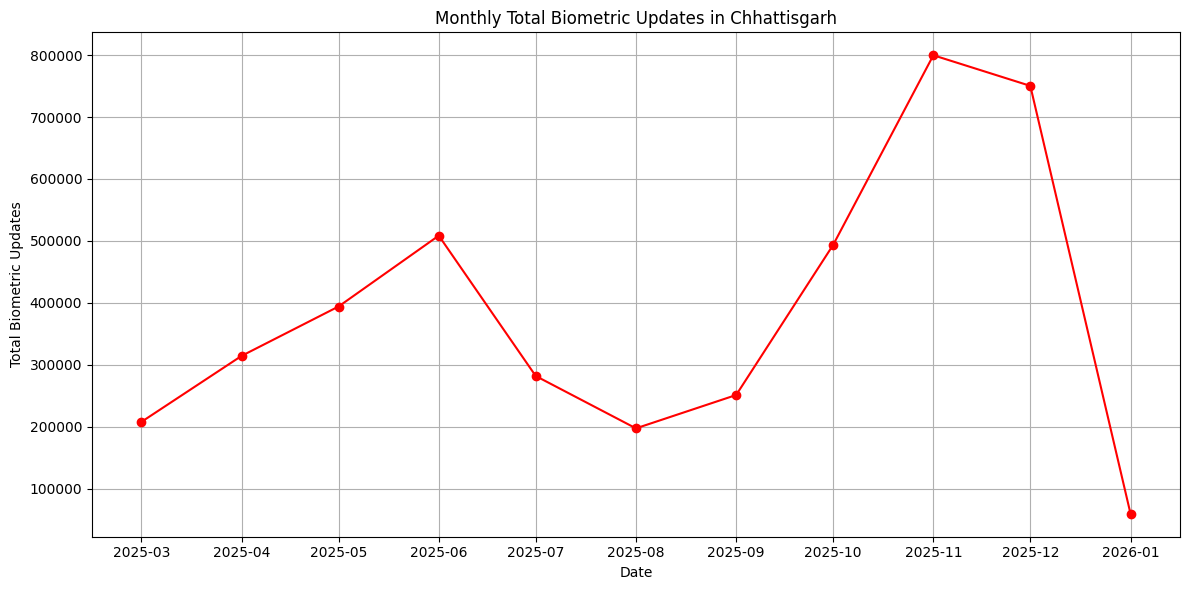

Monthly trend plots generated successfully.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_chhattisgarh_monthly_trends = df_chhattisgarh_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_chhattisgarh_monthly_trends['date'] = pd.to_datetime(df_chhattisgarh_monthly_trends['year'].astype(str) + '-' + df_chhattisgarh_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_chhattisgarh_monthly_trends = df_chhattisgarh_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_chhattisgarh_monthly_trends['date'], df_chhattisgarh_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Chhattisgarh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_chhattisgarh_monthly_trends['date'], df_chhattisgarh_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Chhattisgarh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_chhattisgarh_monthly_trends['date'], df_chhattisgarh_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Chhattisgarh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

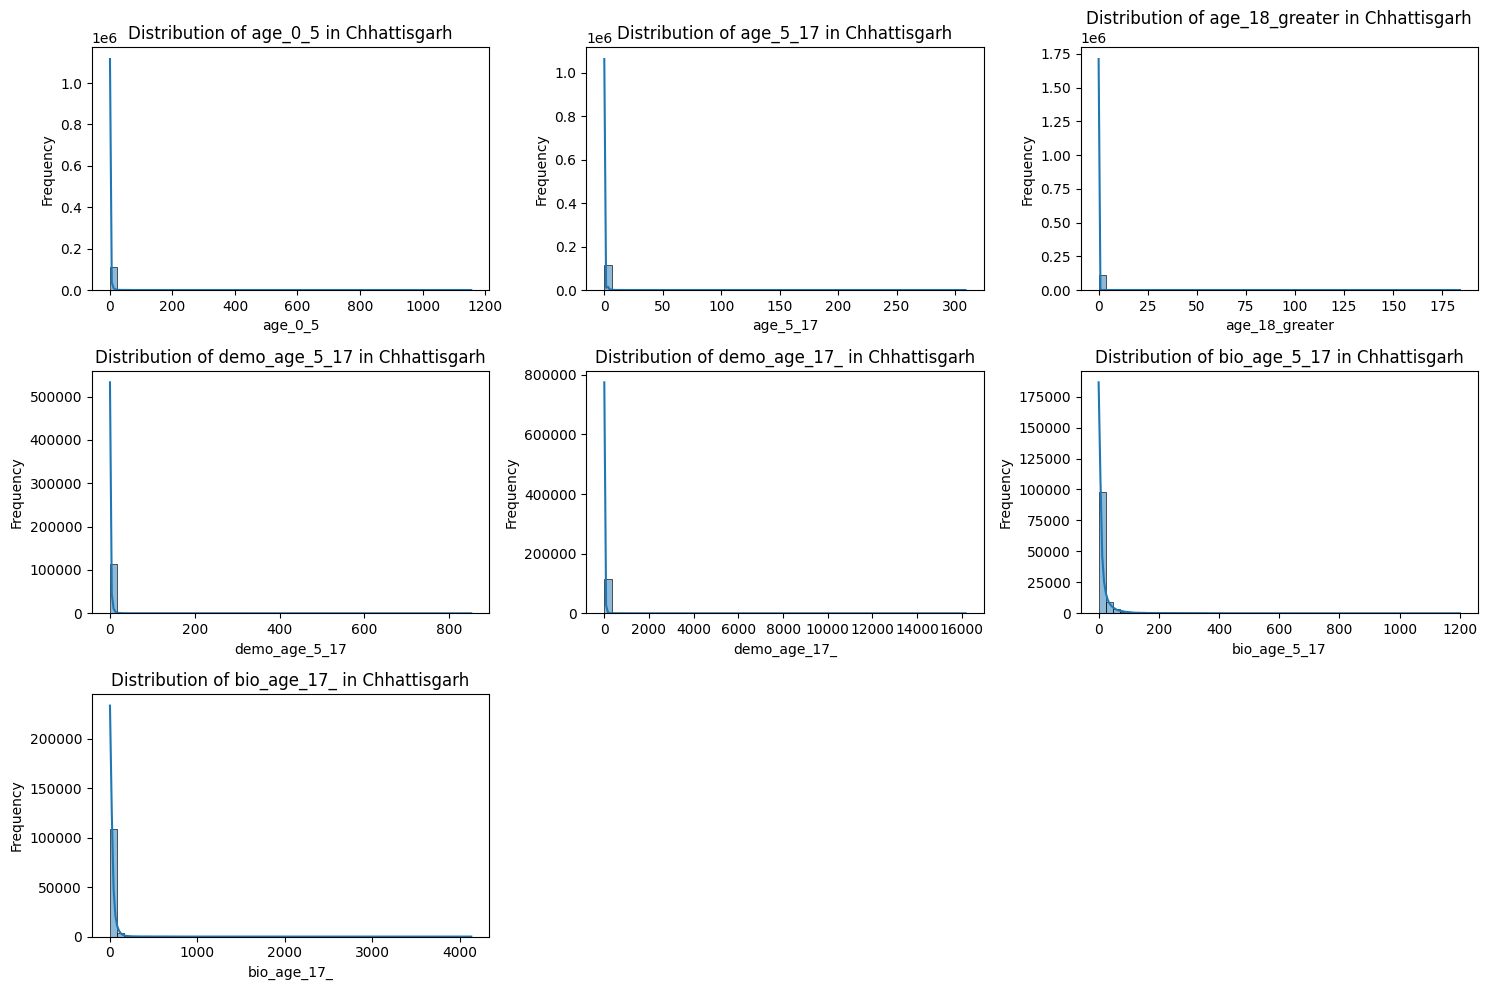

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_chhattisgarh_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Chhattisgarh')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

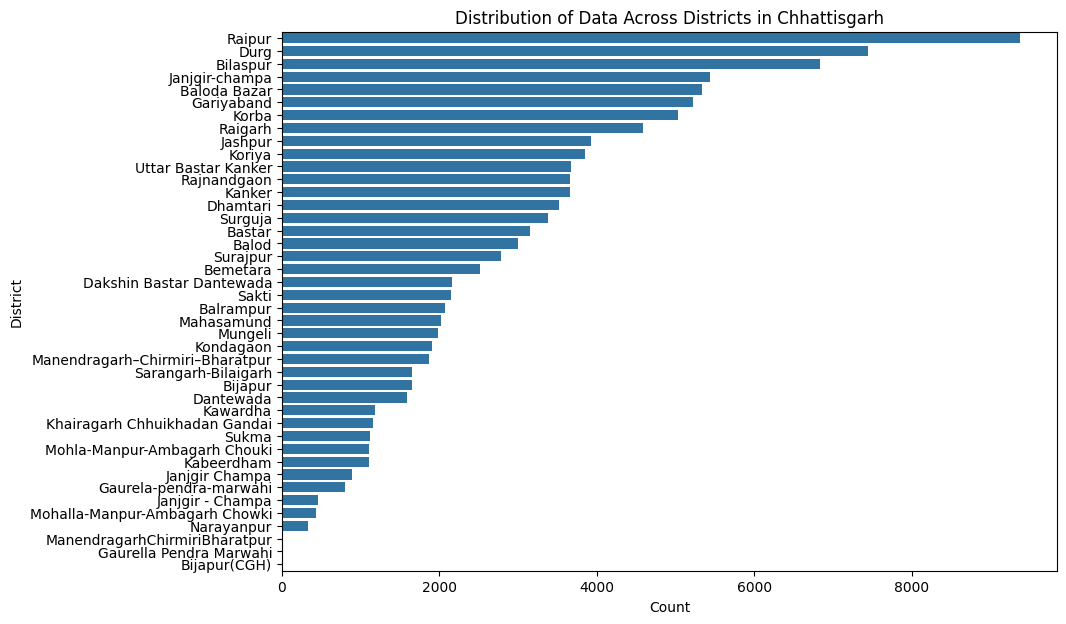

Histograms for numerical age-related columns and count plot for 'district' displayed for Chhattisgarh.


In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_chhattisgarh_merged, y='district', order=df_chhattisgarh_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Chhattisgarh')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Chhattisgarh.")

**Bivaraiate and Trivaraite Analysis**

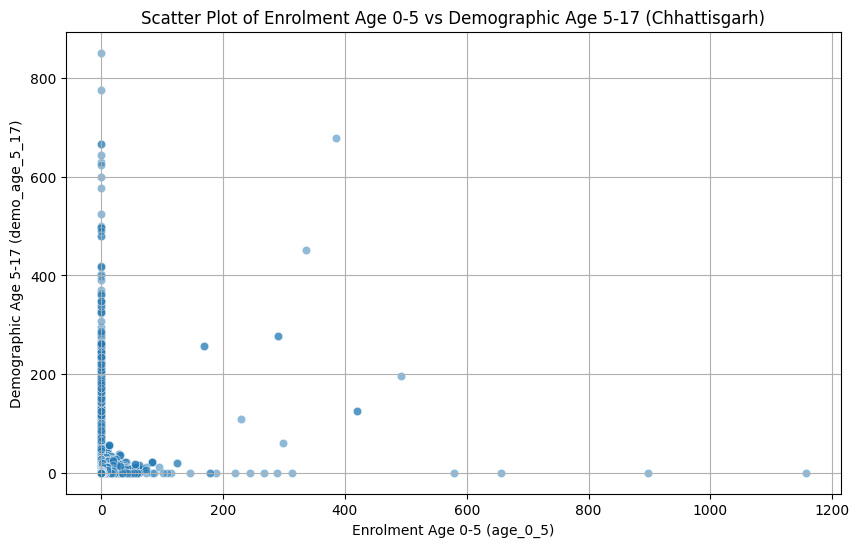

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Chhattisgarh.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_chhattisgarh_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Chhattisgarh)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Chhattisgarh.")

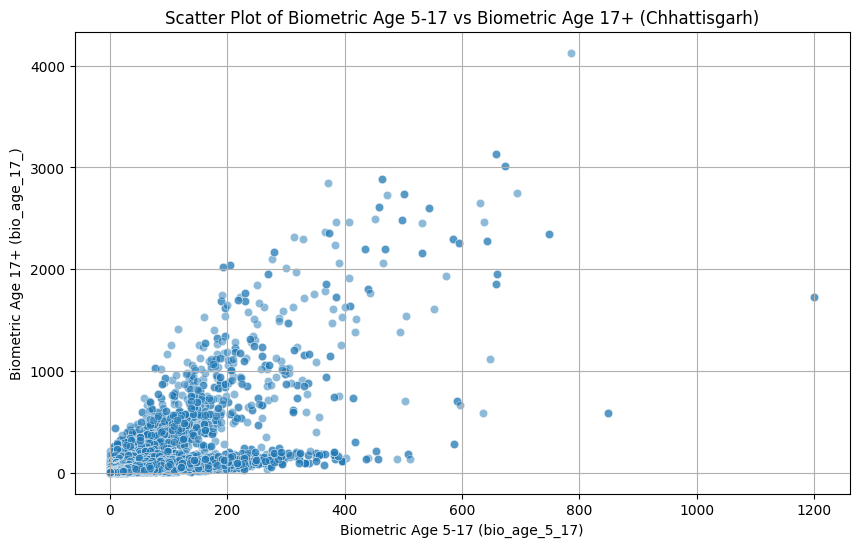

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Chhattisgarh.


In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_chhattisgarh_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Chhattisgarh)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Chhattisgarh.")

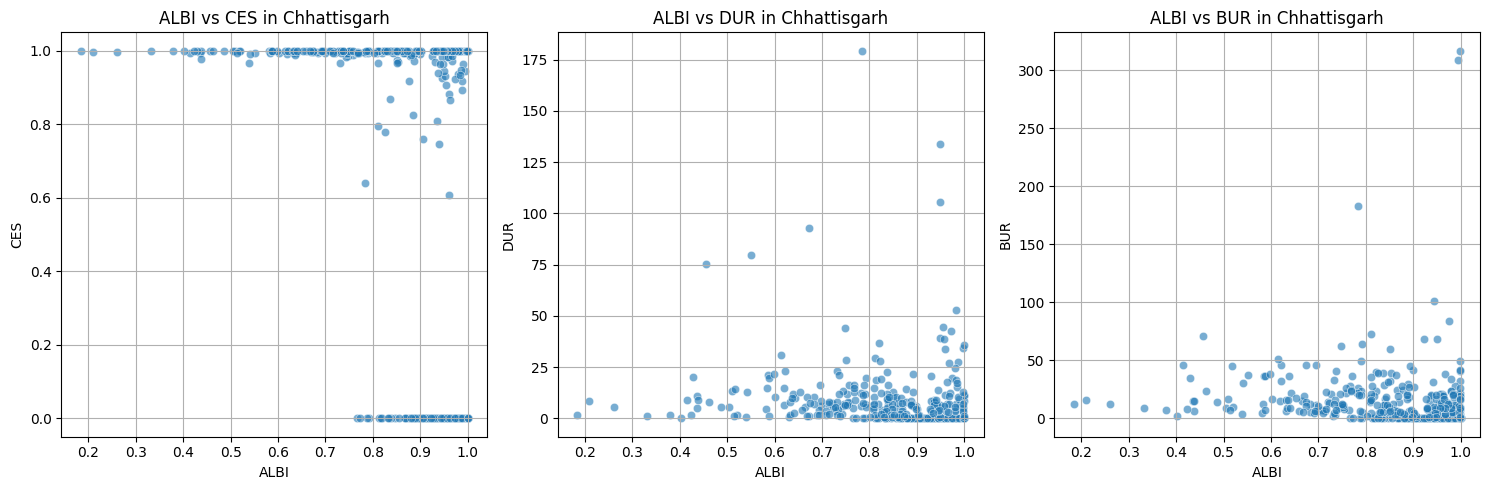

In [22]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_chhattisgarh_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Chhattisgarh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

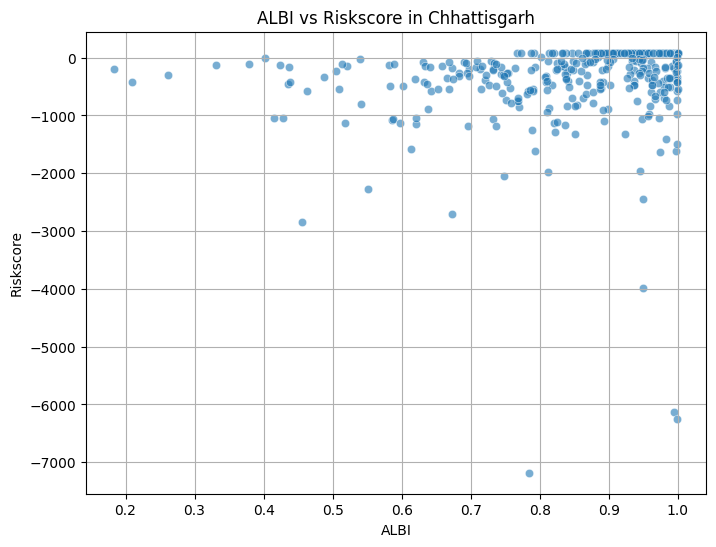

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Chhattisgarh.


In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_chhattisgarh_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Chhattisgarh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Chhattisgarh.")

Correlation Matrix for Chhattisgarh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.766135        0.411514       0.106463   
age_5_17        0.766135  1.000000        0.569487       0.104276   
age_18_greater  0.411514  0.569487        1.000000       0.059681   
demo_age_5_17   0.106463  0.104276        0.059681       1.000000   
demo_age_17_    0.071248  0.071334        0.044046       0.860878   
bio_age_5_17    0.106858  0.063901        0.040424       0.220684   
bio_age_17_     0.047367  0.031690        0.021989       0.245883   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.071248      0.106858     0.047367  
age_5_17            0.071334      0.063901     0.031690  
age_18_greater      0.044046      0.040424     0.021989  
demo_age_5_17       0.860878      0.220684     0.245883  
demo_age_17_        1.000000      0.186738     0.221765  
bio_age_5_17        0.186738      1.000000     0.666562  
bio_

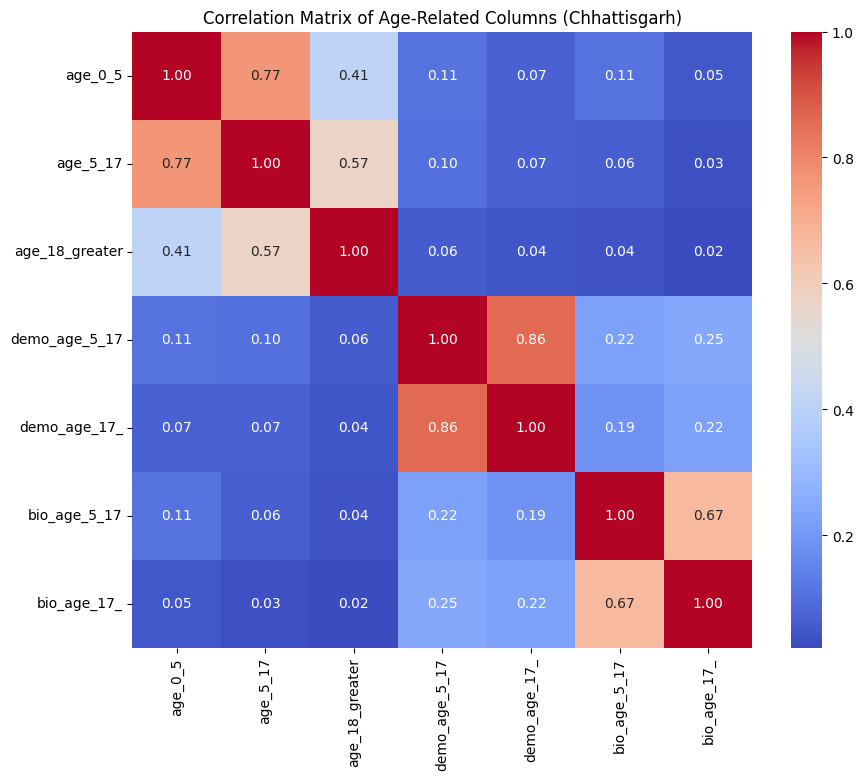

Correlation matrix heatmap for age-related columns displayed for Chhattisgarh.


In [12]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_chhattisgarh = df_chhattisgarh_merged[numerical_age_cols].corr()

print("Correlation Matrix for Chhattisgarh:")
print(correlation_matrix_chhattisgarh)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_chhattisgarh, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Chhattisgarh)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Chhattisgarh.")

In [13]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_chhattisgarh_district_mean = df_chhattisgarh_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Chhattisgarh:")
print(df_chhattisgarh_district_mean.head())
print(df_chhattisgarh_district_mean.info())

df_chhattisgarh_district_mean['total_avg_age'] = df_chhattisgarh_district_mean[age_cols_to_group].sum(axis=1)

print("\nDistrict-wise average age-related data with total average age:")
print(df_chhattisgarh_district_mean.head())
print(df_chhattisgarh_district_mean.info())

District-wise average age-related data for Chhattisgarh:
       district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0         Balod  1.083306  0.056315        0.002666       2.113962   
1  Baloda Bazar  1.550768  0.240914        0.010303       1.697078   
2     Balrampur  3.467501  1.209918        0.041887       1.868079   
3        Bastar  2.934348  1.191564        0.004757       3.307009   
4      Bemetara  1.896620  0.279523        0.008748       1.655666   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0     20.197268     14.413862    28.099300  
1     23.642937     16.162233    23.831023  
2     29.119403     16.489649    25.265768  
3     24.052965     14.058357    33.506185  
4     21.650099     22.279523    46.209145  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        42 non-null     object 
 1   age_0_5   

Top 10 districts by total average age-related counts for Chhattisgarh:
                         district  total_avg_age
14        Gaurella Pendra Marwahi     327.666667
21                       Kawardha     149.549284
32                     Narayanpur     149.361963
26                     Mahasamund     132.923495
35                    Rajnandgaon     108.897625
31                        Mungeli     105.560162
27  ManendragarhChirmiriBharatpur     104.000000
4                        Bemetara      93.979324
33                        Raigarh      84.000218
23                      Kondagaon      81.483770


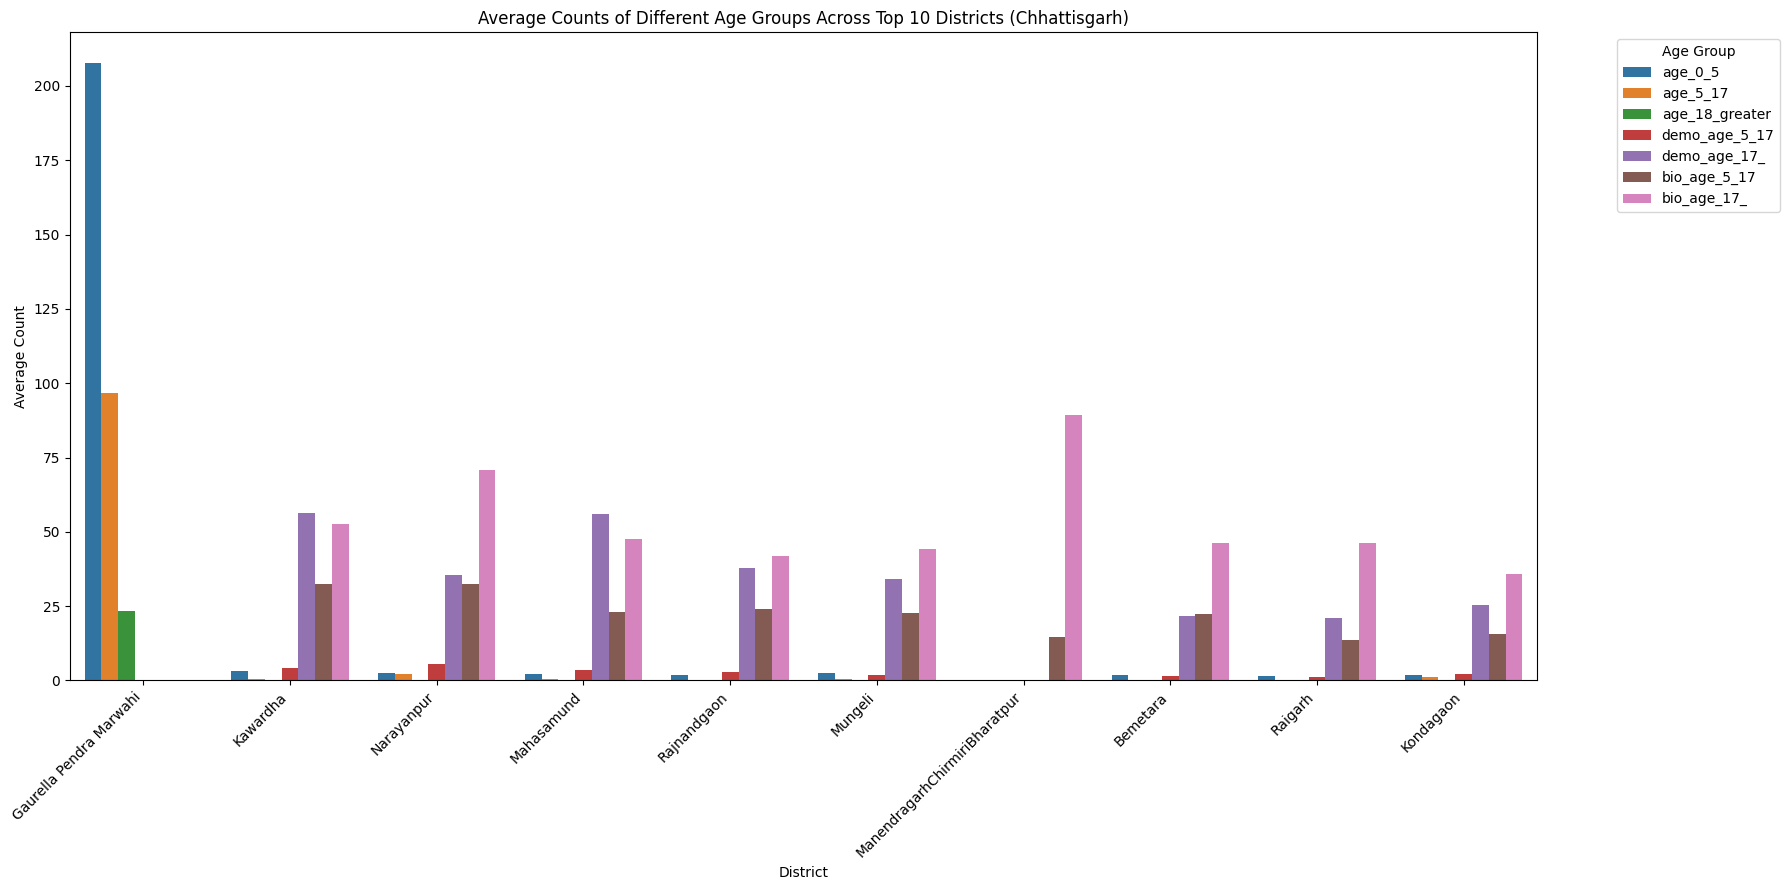

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Chhattisgarh, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [14]:
df_chhattisgarh_district_mean_top10 = df_chhattisgarh_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Chhattisgarh:")
print(df_chhattisgarh_district_mean_top10[['district', 'total_avg_age']])

df_chhattisgarh_district_mean_melted = df_chhattisgarh_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_chhattisgarh_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Chhattisgarh)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Chhattisgarh, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Chhattisgarh:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        15535.0      243895.0   
1 2025-03-27    115.0      46.0            99.0            0.0           0.0   
2 2025-04-01   1299.0     254.0           192.0         5803.0       56376.0   
3 2025-05-01   1123.0     325.0           210.0         7786.0       73874.0   
4 2025-05-20      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       47429.0     160547.0  
1           0.0          0.0  
2       53097.0     261430.0  
3       52595.0     219956.0  
4        2190.0      10516.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            232 non-null    date

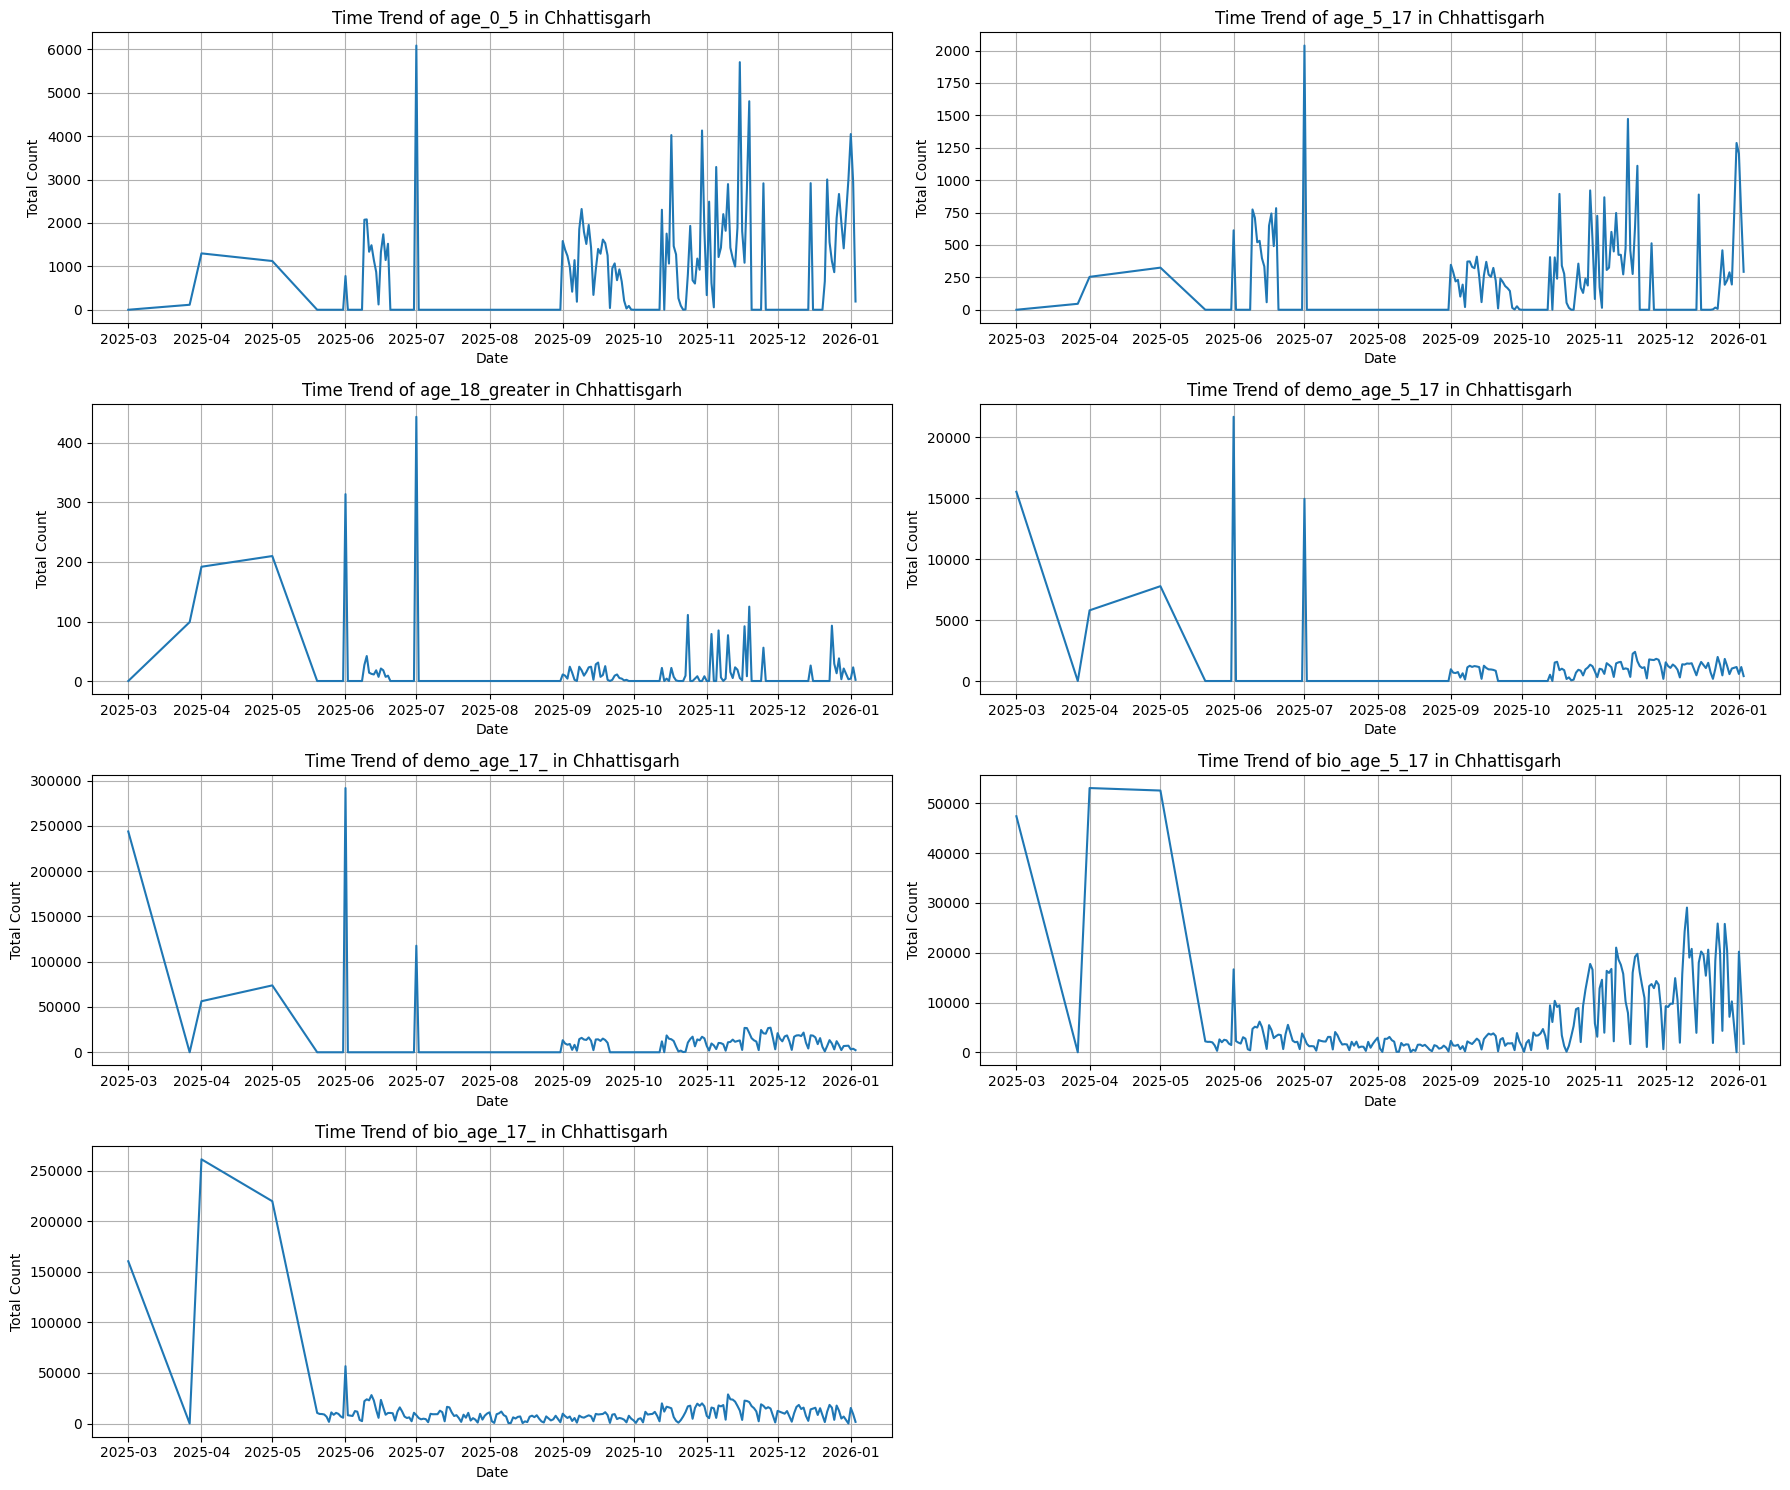

Insight: Line charts for each age-related column over time in Chhattisgarh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [15]:
df_chhattisgarh_time_trend = df_chhattisgarh_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Chhattisgarh:")
print(df_chhattisgarh_time_trend.head())
print(df_chhattisgarh_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_chhattisgarh_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Chhattisgarh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Chhattisgarh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

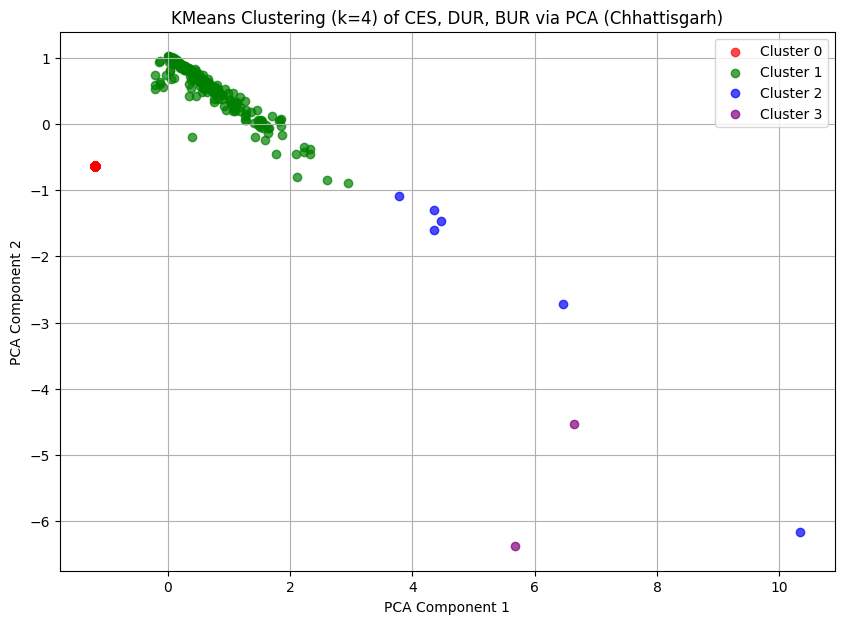

First 5 rows of df_chhattisgarh_agg with 'clusterlabel' column:
   year  month         state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chhattisgarh         Balod      0.0       0.0             0.0   
1  2025      3  Chhattisgarh  Baloda Bazar      0.0       0.0             0.0   
2  2025      3  Chhattisgarh     Balrampur      0.0       0.0             0.0   
3  2025      3  Chhattisgarh        Bastar      0.0       0.0             0.0   
4  2025      3  Chhattisgarh      Bemetara      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          626.0        7861.0        1101.0  ...  0.079126  0.090115   
1          547.0       19367.0        1797.0  ...  0.090866  0.179847   
2          371.0        4179.0         653.0  ...  0.030734  0.044416   
3          686.0        8259.0        1188.0  ...  0.077298  0.092945   
4          266.0        8117.0         898.0  ...  0.088232  0.092369   

       ALB

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_chhattisgarh_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_chhattisgarh_agg
df_chhattisgarh_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_chhattisgarh_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Chhattisgarh)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_chhattisgarh_agg with 'clusterlabel' column:")
print(df_chhattisgarh_agg.head())

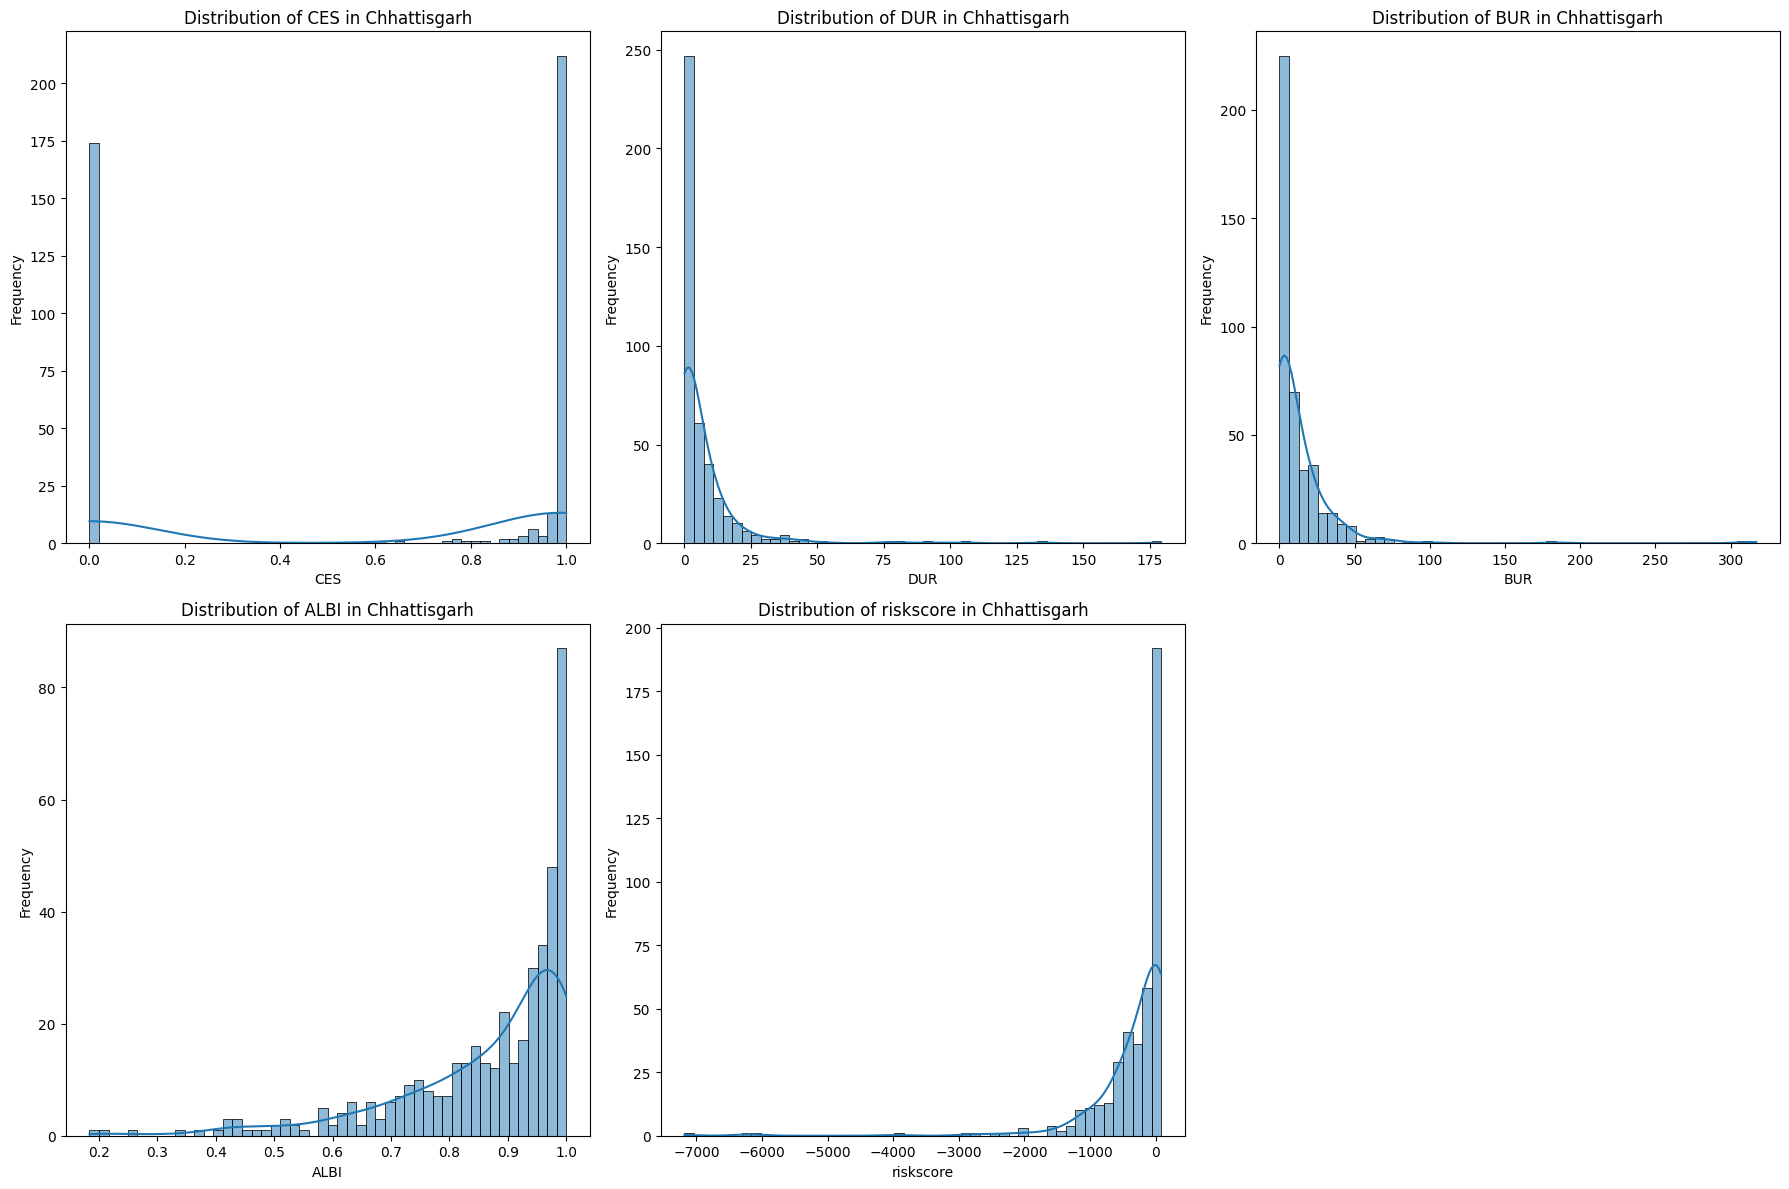

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Chhattisgarh.


In [17]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_chhattisgarh_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Chhattisgarh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Chhattisgarh.")

In [18]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_chhattisgarh_agg['year'].max()
latest_month = df_chhattisgarh_agg[df_chhattisgarh_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period for Chhattisgarh: Year {latest_year}, Month {latest_month}")

# 2. Filter df_chhattisgarh_agg for the latest year and month
df_latest_month_chhattisgarh = df_chhattisgarh_agg[(df_chhattisgarh_agg['year'] == latest_year) & (df_chhattisgarh_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics_chhattisgarh = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_chhattisgarh:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For CES, DUR, BUR, ALBI, top 10 implies best performance, so ascending for ALBI and descending for others
    if metric == 'ALBI':
        top_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=False).head(10)
        bottom_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10_chhattisgarh[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10_chhattisgarh[['district', metric]].to_string(index=False))
    elif metric == 'riskscore':
        # For riskscore, 'top' means highest risk, so ascending=False
        top_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=False).head(10)
        # For riskscore, 'bottom' means lowest risk, so ascending=True
        bottom_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10_chhattisgarh[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10_chhattisgarh[['district', metric]].to_string(index=False))
    else: # For CES, DUR, BUR
        top_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=False).head(10)
        bottom_10_chhattisgarh = df_latest_month_chhattisgarh.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10_chhattisgarh[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10_chhattisgarh[['district', metric]].to_string(index=False))

Latest reporting period for Chhattisgarh: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
    district  CES
       Balod  1.0
Baloda Bazar  1.0
   Balrampur  1.0
    Bemetara  1.0
    Bilaspur  1.0
    Dhamtari  1.0
   Dantewada  1.0
       Sukma  1.0
 Rajnandgaon  1.0
        Durg  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
                district      CES
               Kondagaon 0.966555
Dakshin Bastar Dantewada 0.989189
              Mahasamund 0.994152
                 Bijapur 0.994269
                 Surguja 0.994898
                  Bastar 0.998261
               Balrampur 1.000000
            Baloda Bazar 1.000000
               Dantewada 1.000000
                Dhamtari 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
                       district       DUR
         Gaurela-pendra-marwahi 14.000000
   Mohla-Manpur-Ambagarh Chouki 12.515152
            Sarangarh-Bilaigarh  4.500000
Manendragarh–

## Summarize Findings (Chhattisgarh)

### Subtask:
Provide a comprehensive summary of the analysis for Chhattisgarh, highlighting key observations, district performance, identified anomalies (e.g., in risk score or update rates), insights, and recommendations for further investigation or intervention.


## Summary:

### Data Analysis Key Findings

*   **Data Integration:** Three distinct datasets for Chhattisgarh (Enrolment, Demographic, Biometric) were successfully loaded, preprocessed, and merged into a unified DataFrame. Numerical NaN values were filled with 0.
*   **Key Metric Calculation:** Several crucial metrics were calculated, including `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, `Child Enrolment Score (CES)`, `Demographic Update Rate (DUR)`, `Biometric Update Rate (BUR)`, `Aadhaar Lifecycle Balance Index (ALBI)`, and a comprehensive `riskscore`.
*   **Monthly Trends:** Visualizations revealed the temporal evolution of `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` across Chhattisgarh, showing overall patterns of activity.
*   **District Performance in Age-Related Activities:** `Gaurella Pendra Marwahi`, `Kawardha`, and `Narayanpur` were identified as the top 3 districts based on the average total age-related activities.
*   **Clustering for Performance Grouping:** KMeans clustering on CES, DUR, and BUR metrics helped categorize districts into 4 distinct groups, indicating varying patterns of Aadhaar lifecycle performance across the state.
*   **Distribution of Performance and Risk Metrics:** Histograms provided insights into the distribution of CES, DUR, BUR, ALBI, and riskscore, showing their spread and common ranges.
*   **Anomalies and Outliers in Latest Period (Year 2026, Month 1):**
    *   **CES (Child Enrolment Score):** Districts like Balod, Baloda Bazar, and Balrampur showed perfect scores of 1.0, while Kondagaon had the lowest at 0.966555.
    *   **DUR (Demographic Update Rate):** Gaurela-pendra-marwahi (14.0) and Mohla-Manpur-Ambagarh Chouki (12.515) exhibited significantly high rates, whereas Janjgir Champa recorded a 0.0 DUR.
    *   **BUR (Biometric Update Rate):** Dhamtari (12.335) and Raipur (12.009) had the highest rates, while Khairagarh Chhuikhadan Gandai (0.322581) and Mohla-Manpur-Ambagarh Chouki (0.515152) had the lowest.
    *   **ALBI (Aadhaar Lifecycle Balance Index):** Janjgir Champa (0.999678) and Mohalla-Manpur-Ambagarh Chowki (0.998913) recorded the highest ALBI, indicating good balance, contrasting with Raipur (0.183638) and Bilaspur (0.331639) which had the lowest.
    *   **Risk Score:** Mohalla-Manpur-Ambagarh Chowki (10.004) and Bijapur (8.964) showed the highest risk. Notably, districts like Gaurela-pendra-marwahi (-303.496) and Dhamtari (-215.593) presented unusually low (negative) risk scores, indicating potential calculation anomalies or extremely high performance that needs validation.

### Insights or Next Steps

*   **Investigate Extreme Values:** Districts with exceptionally high demographic or biometric update rates (e.g., Gaurela-pendra-marwahi for DUR) and those with negative risk scores (e.g., Gaurela-pendra-marwahi, Dhamtari) should be further investigated to understand the underlying data or operational reasons for these extreme values. This could highlight best practices or data quality issues.
*   **Targeted Interventions:** Utilize the identified clusters to develop tailored strategies. Districts within low-performing clusters (e.g., those with low CES, DUR, or BUR, or high risk scores) should be prioritized for intervention programs, focusing on the specific metrics where they underperform.
